## Import and Setup

In [101]:
import re
import warnings
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report


warnings.simplefilter(action='ignore')

In [80]:
student_data = pd.read_csv(r'C:\Users\n8mau\OneDrive\Desktop\Professional Certificate in Machine Learning and Artificial Intelligence\Module 23\dataset.csv')

In [81]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## Clean Dataframe

4424 unique samples in the dataset.
Of the 35 columns in the dataset, there were 3 that needed clarification and renaming for better analysis and context. 


In [82]:
# Renaming misspelled or mislabeled columns
student_data.rename(columns={'Daytime/evening attendance': 'Daytime/Evening Program', 'Nacionality': 'Nationality', 'Target': 'Outcome'}, inplace=True)

# Displaying the dataframe with renamed columns
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/Evening Program,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Outcome
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [83]:
# Checking for missing values
student_data.dropna(inplace=True)

## Data Distribution

Analysis of the student population based on preliminary evaluation with graphs. We find that close to the majority of the population are graduates, and females are more likely to graduate than their male counterparts. Nursing has the highest graduation rate and Business Administration, especially evening classes, have high dropout rates.

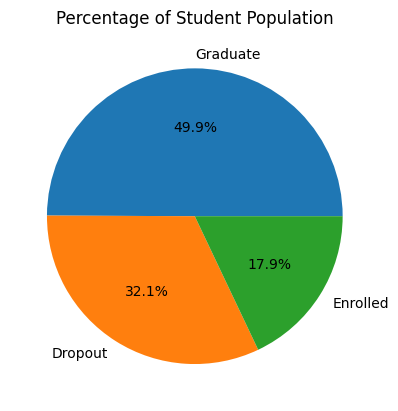

In [41]:
# Calculating the value counts of population
student_target = student_data['Outcome'].value_counts()

# Plotting the pie chart
plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Population')
plt.show()

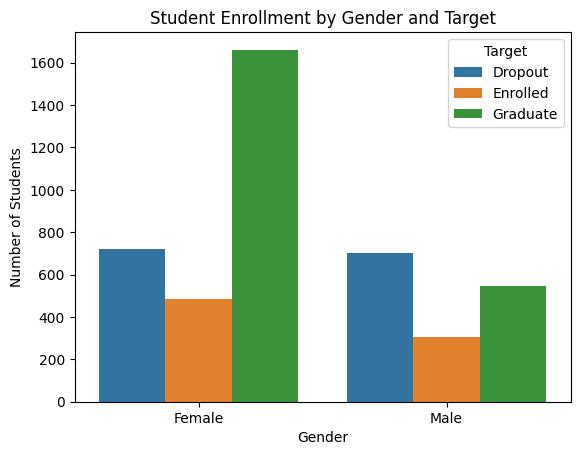

In [7]:
#Comparing the average age of students who are enrolled, graduated, and dropped out
sns.countplot(data=student_data, x='Gender', hue='Outcome', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.title('Student Enrollment by Gender and Outcome')
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

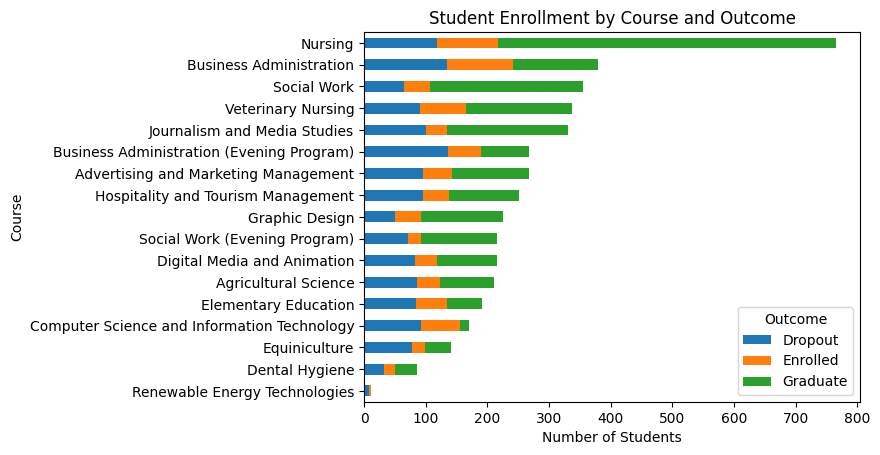

In [42]:
# Grouping the data by 'Course' and 'Outcome'
student_course = student_data.groupby(['Course', 'Outcome']).size().reset_index().pivot(columns='Outcome', index='Course', values=0)

# Renaming the index of the Dataframe
student_course = student_course.rename(index={1:'Renewable Energy Technologies',2:'Digital Media and Animation',3:'Social Work (Evening Program)',4:'Agricultural Science',5:'Graphic Design',6:'Veterinary Nursing',7:'Computer Science and Information Technology',8:'Equiniculture',9:'Business Administration',10:'Social Work',11:'Hospitality and Tourism Management',12:'Nursing',13:'Dental Hygiene',14:'Advertising and Marketing Management',15:'Journalism and Media Studies',16:'Elementary Education',17:'Business Administration (Evening Program)'})
student_course_total = student_course.sum(axis=1)
student_course_sorted = student_course_total.sort_values(ascending=True)
student_course.loc[student_course_sorted.index].plot(kind='barh', stacked=True)

# Adding title and labels
plt.title('Student Enrollment by Course and Outcome', loc='center')
plt.ylabel('Course')
plt.xlabel('Number of Students')
plt.show()

## Correlation Matrix

Using a correlation matrix to identify influential characteristics / variables there is a deeper understanding of the relationships among the dataset's variables. Below are the key insights and implications drawn from this matrix:

Strong positive clusters and negative signals:
* The variables shown in the bottom right move together, along with factors like parent previous qualifications, parent occupation, marital status, nationality, and age at enrollment. Where the negative signals grouped around displaced students, and gender. 

Log-Log Relationship:
* Strong correlations indicate that the logarithmic transformations of these variables maintain proportional changes, essential for predicting scaling behaviors. These transformations can be conducted on variables like the parent previous qualifications listed in the dataset.

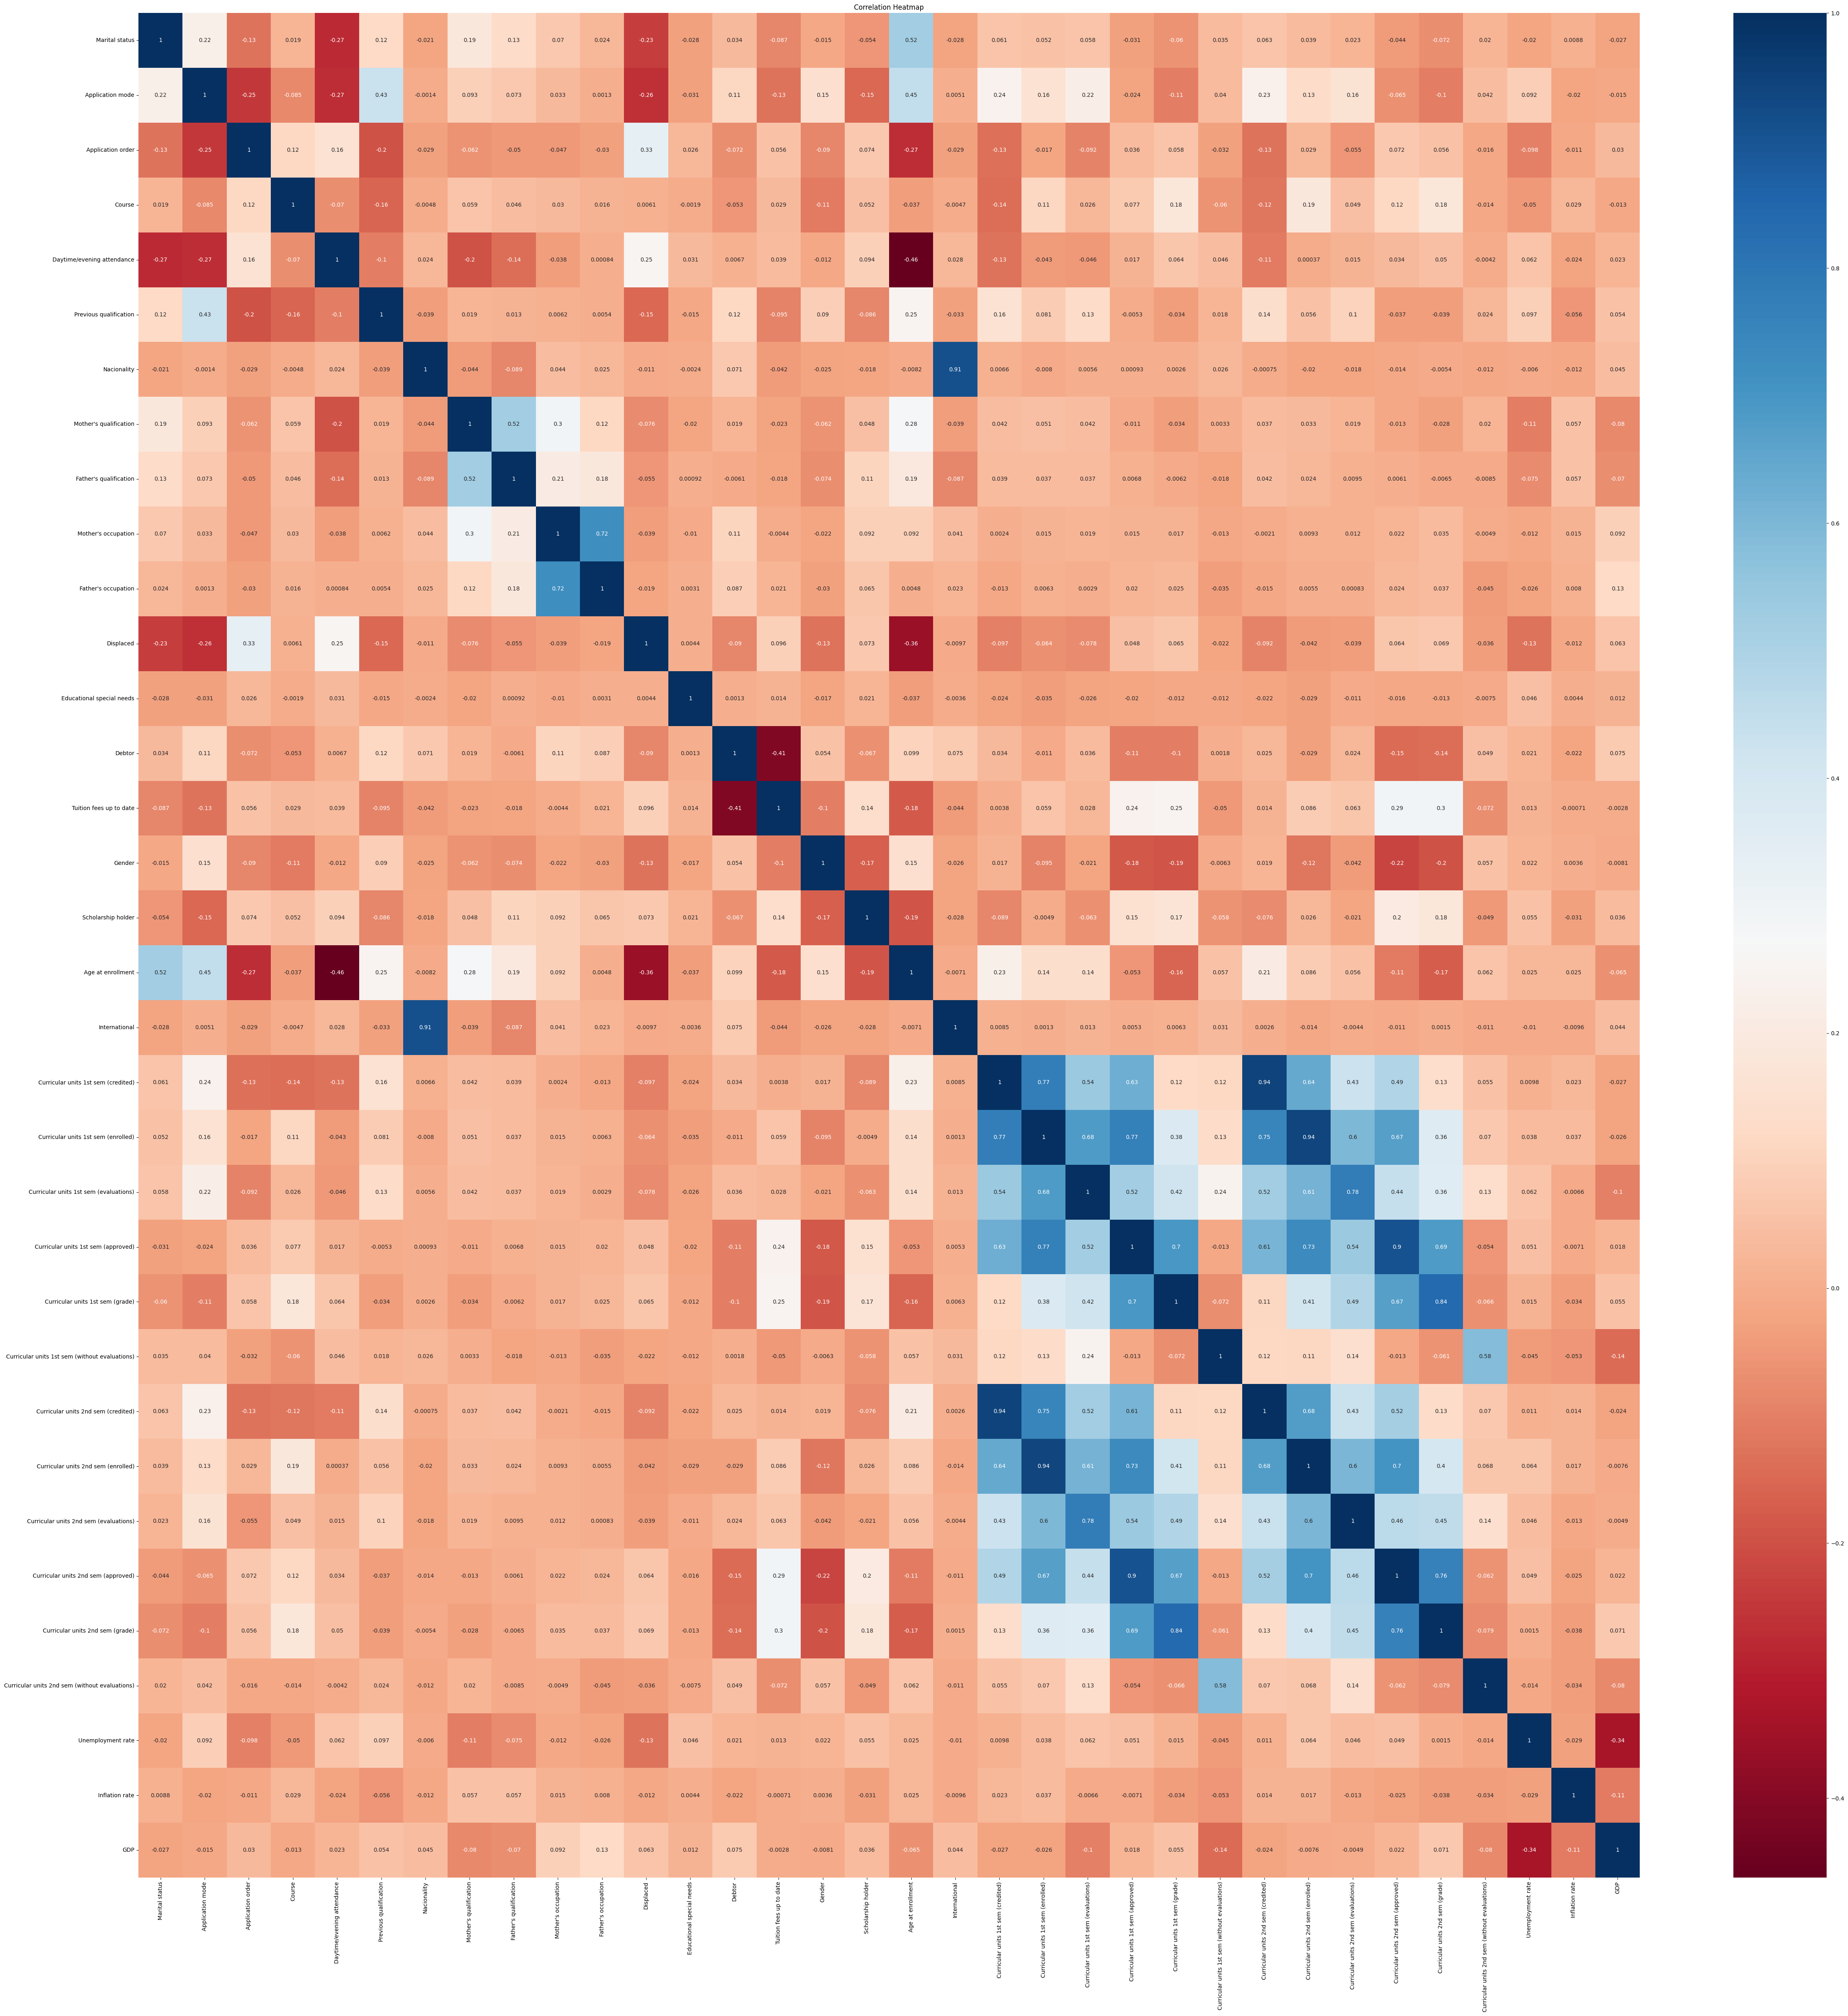

In [43]:
# Plotting the correlation heatmap
plt.figure(figsize=(60,60))
sns.heatmap(numerical_cols_student_data.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap', fontsize=12)
plt.yticks(rotation=0)
plt.show()